In [1]:
# Functions 
def split(x, pattern):
    '''Regex pattern finds in data and returns match. Then, it is splitted accordingly.
        \d = digits
        \l = lowercase alphabet
        \p = uppercase alphabet
        \a = all alphabet
        \s = symbols and punctuation
        \e = end of sentence
        '''
    pattern2 = pattern.replace('\d','[0-9]').replace('\l','[a-z]').replace('\p','[A-Z]').replace('\a','[a-zA-Z]')\
                .replace('\s','[^0-9a-zA-Z]').replace('\e', '(?:\s|$)')
    
    if dtype(x) != 'object': print('Data is not string. Convert first'); return False;
    
    regex = re.compile(r'{}'.format(pattern))
    if pattern == pattern2: return x.str.split(pattern)
    else: return x.apply(lambda i: re.split(regex, i))
    
def Checker(x):
    if type(x) is pd.DataFrame: return 0
    elif type(x) is pd.Series: return 1
    else: return -1
    
def dtype(data):
    what = Checker(data)
    if what == 0:
        dtypes = data.dtypes.astype('str')
        dtypes = dtypes.str.split(r'\d').str[0]
    else:
        dtypes = str(data.dtypes)
        dtypes = re.split(r'\d', dtypes)[0]
    return dtypes

In [2]:
#Importing Required Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn import metrics

# Data Preprocessing

In [3]:
#Importing Dataset
Actors=pd.read_csv('Movie_Actors.csv')
AddRatings=pd.read_csv('Movie_AdditionalRating.csv')
Genre=pd.read_csv("Movie_Genres.csv")
Movies=pd.read_csv("Movie_Movies.csv")
Writer=pd.read_csv('Movie_Writer.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Merging datasets
df1=Actors.merge(Writer,on='imdbID')
df2=df1.merge(AddRatings,on='imdbID')
df3=df2.merge(Genre,on='imdbID')
df4=df3.merge(Movies,on='imdbID')
Movies_df=df4

In [5]:
#selected only 5 values from start to understand the data
Movies_df.head()

,Unnamed: 0_x,Actors,imdbID,Unnamed: 0_y,Person,Responsibility,Unnamed: 0_x,Rating,RatingSource,Unnamed: 0_y,...,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbRating,imdbVotes
0,21,Seth Green,tt0206367,3,Judy Rothman Rofé,screenplay,4,5.0/10,Internet Movie Database,37,...,Columbia Pictures,G,1-Mar-01,75 min,The Trumpet of the Swan,movie,NaN,2001,5.0,813.0
1,21,Seth Green,tt0206367,3,Judy Rothman Rofé,screenplay,4,5.0/10,Internet Movie Database,38,...,Columbia Pictures,G,1-Mar-01,75 min,The Trumpet of the Swan,movie,NaN,2001,5.0,813.0
2,21,Seth Green,tt0206367,3,Judy Rothman Rofé,screenplay,4,5.0/10,Internet Movie Database,39,...,Columbia Pictures,G,1-Mar-01,75 min,The Trumpet of the Swan,movie,NaN,2001,5.0,813.0
3,21,Seth Green,tt0206367,3,Judy Rothman Rofé,screenplay,5,15%,Rotten Tomatoes,37,...,Columbia Pictures,G,1-Mar-01,75 min,The Trumpet of the Swan,movie,NaN,2001,5.0,813.0
4,21,Seth Green,tt0206367,3,Judy Rothman Rofé,screenplay,5,15%,Rotten Tomatoes,38,...,Columbia Pictures,G,1-Mar-01,75 min,The Trumpet of the Swan,movie,NaN,2001,5.0,813.0


In [6]:
Movies_df.shape

(198118, 28)

In [7]:
# Deleting the Unnamed: 0 coloumn which is not at all necessary
Movies_df.drop('Unnamed: 0_x', axis = 1, inplace = True)
Movies_df.drop('Unnamed: 0_y',axis=1,inplace=True)

In [8]:
#Removing duplicate values
Movies_df.drop_duplicates(subset='imdbID',inplace=True)
Movies_df

,Actors,imdbID,Person,Responsibility,Rating,RatingSource,Genre,Awards,Country,DVD,...,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbRating,imdbVotes
0,Seth Green,tt0206367,Judy Rothman Rofé,screenplay,5.0/10,Internet Movie Database,Animation,1 nomination.,USA,31-Jul-01,...,Columbia Pictures,G,1-Mar-01,75 min,The Trumpet of the Swan,movie,NaN,2001,5.0,813.0
18,Richard Jaeckel,tt0046287,Norman Reilly Raine,story,7.6/10,Internet Movie Database,Adventure,NaN,USA,NaN,...,NaN,Approved,1-Feb-54,85 min,Sea of Lost Ships,movie,NaN,1953,7.6,16.0
22,Grant Mitchell,tt0025597,Franz Schulz,story,6.8/10,Internet Movie Database,Comedy,NaN,USA,NaN,...,NaN,NaN,1-Sep-34,70 min,One Exciting Adventure,movie,NaN,1934,6.8,10.0
24,Madeleine Potter,tt0098347,Tama Janowitz,based on the stories by,5.4/10,Internet Movie Database,Drama,NaN,USA,26-Jul-05,...,Sony Pictures Home Entertainment,R,1-Mar-89,124 min,Slaves of New York,movie,NaN,1989,5.4,777.0
32,Virginia Herrick,tt0042967,Daniel B. Ullman,original screenplay,5.9/10,Internet Movie Database,Western,NaN,USA,NaN,...,NaN,APPROVED,20-Oct-50,55 min,Silver Raiders,movie,NaN,1950,5.9,7.0
33,Thomas Baptiste,tt0069796,Russ Meyer,screenplay,5.1/10,Internet Movie Database,Thriller,NaN,USA,NaN,...,NaN,R,10-Aug-73,82 min,Black Snake,movie,NaN,1973,5.1,460.0
39,Tom Neal,tt0043064,Don 'Red' Barry,story,4.8/10,Internet Movie Database,Western,NaN,USA,NaN,...,Lippert Pictures,NOT RATED,16-Sep-50,56 min,Train to Tombstone,movie,NaN,1950,4.8,41.0
40,Roger Dumas,tt0053230,René Lefèvre,novel,6.8/10,Internet Movie Database,Drama,NaN,"France, Italy",NaN,...,NaN,NaN,21-Oct-59,87 min,Rue de Paris,movie,NaN,1959,6.8,130.0
41,Booth Colman,tt0058512,Harry Spalding,screenplay,3.7/10,Internet Movie Database,Crime,NaN,USA,NaN,...,NaN,NOT RATED,24-Feb-66,73 min,Raiders from Beneath the Sea,movie,NaN,1964,3.7,122.0
45,Piyakarn Butprasert,tt1621642,Benjamaporn Srabua,screenplay,7.3/10,Internet Movie Database,Comedy,1 win & 2 nominations.,Thailand,NaN,...,NaN,NaN,15-Oct-09,126 min,Bangkok Traffic (Love) Story,movie,NaN,2009,7.3,1121.0


In [9]:
Movies_df.shape

(18896, 24)

In [10]:
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18896 entries, 0 to 198100
Data columns (total 24 columns):
Actors            18896 non-null object
imdbID            18896 non-null object
Person            18896 non-null object
Responsibility    18896 non-null object
Rating            18896 non-null object
RatingSource      18896 non-null object
Genre             18896 non-null object
Awards            6747 non-null object
Country           18868 non-null object
DVD               7165 non-null object
Director          18725 non-null object
Language          18551 non-null object
Plot              16026 non-null object
Poster            14833 non-null object
Production        7950 non-null object
Rated             9002 non-null object
Released          17205 non-null object
Runtime           17742 non-null object
Title             18896 non-null object
Type              18896 non-null object
Website           2959 non-null object
Year              18896 non-null object
imdbRating     

In [11]:
Movies_df.isnull().sum()

Actors                0
imdbID                0
Person                0
Responsibility        0
Rating                0
RatingSource          0
Genre                 0
Awards            12149
Country              28
DVD               11731
Director            171
Language            345
Plot               2870
Poster             4063
Production        10946
Rated              9894
Released           1691
Runtime            1154
Title                 0
Type                  0
Website           15937
Year                  0
imdbRating           25
imdbVotes            25
dtype: int64

# Exploratory Data Analysis

In [12]:
# No of Movies per Actor
finalactors=Movies_df['Actors'].value_counts()[:10]
DoubleFilteredActors=pd.DataFrame({'Actors':finalactors.index, 'NumberOfMovies':finalactors.values})
DoubleFilteredActors

,Actors,NumberOfMovies
0,Mel Blanc,72
1,Grace Stafford,12
2,Jack Mercer,12
3,Pinto Colvig,10
4,Mae Questel,10
5,Walter Brennan,9
6,Herbert Lom,8
7,Allen Jenkins,8
8,Edward Arnold,8
9,John Nesbitt,8


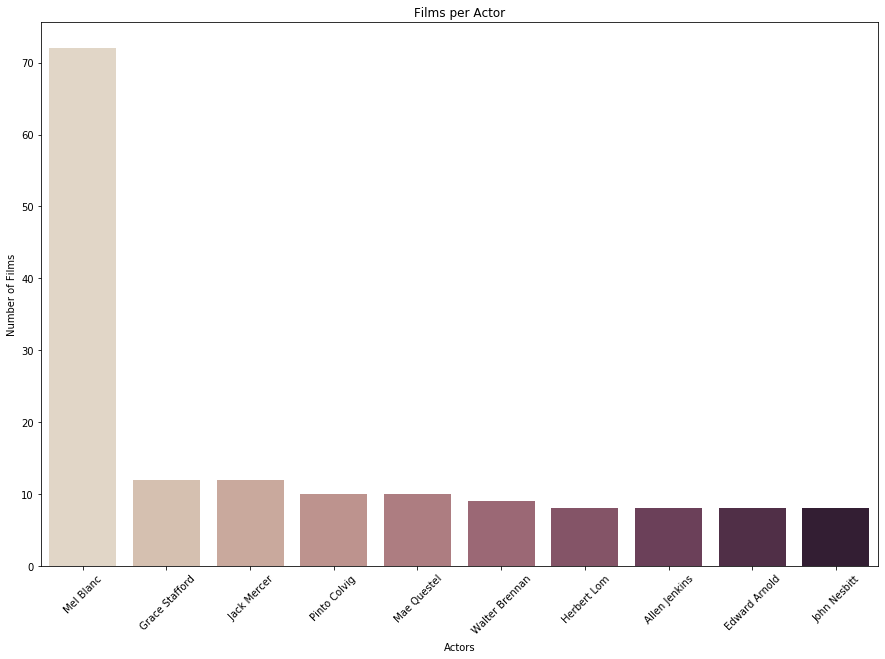

In [13]:
plt.figure(figsize=(15,10))
boom=sns.barplot(x="Actors", y='NumberOfMovies', palette="ch:.25", data=DoubleFilteredActors)
plt.xticks(rotation= 45)
plt.xlabel('Actors')
plt.ylabel('Number of Films')
plt.title('Films per Actor')
plt.show()

Text(0.5, 1.0, 'TOP 10 ActorS OF MOVIES')

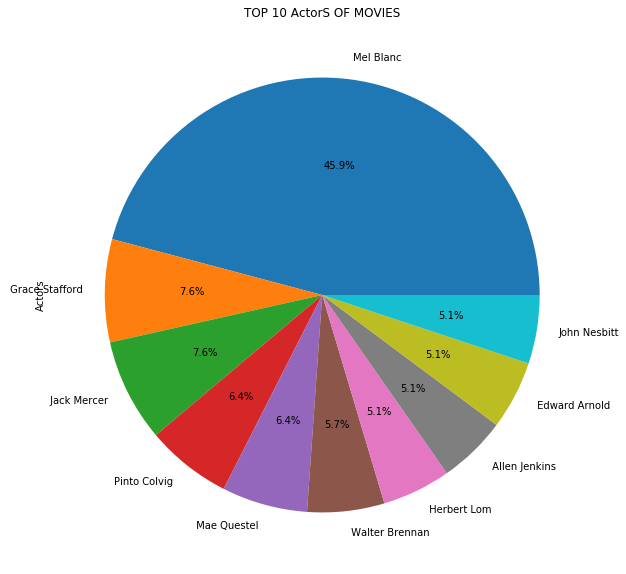

In [14]:
Movies_df.Actors.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(15,10))
plt.title('TOP 10 ActorS OF MOVIES')

In [15]:
# no of movies per person
Persons=Movies_df['Person'].value_counts()[:10]
DoubleFilteredPersons=pd.DataFrame({'Persons':Persons.index, 'NumberOfMovies':Persons.values})
DoubleFilteredPersons

,Persons,NumberOfMovies
0,William Shakespeare,51
1,H.M. Walker,34
2,Michael Maltese,30
3,Stephen King,30
4,Charles Dickens,29
5,Edgar Allan Poe,23
6,Warren Foster,21
7,Hans Christian Andersen,20
8,H.P. Lovecraft,16
9,Tedd Pierce,16


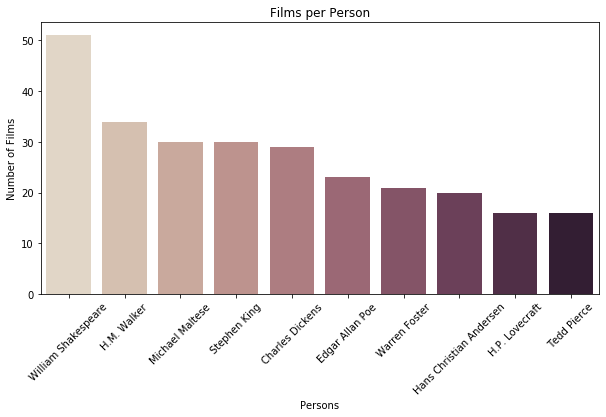

In [16]:
plt.figure(figsize=(10,5))
boom=sns.barplot(x="Persons", y='NumberOfMovies', palette="ch:.25", data=DoubleFilteredPersons)
plt.xticks(rotation= 45)
plt.xlabel('Persons')
plt.ylabel('Number of Films')
plt.title('Films per Person')
plt.show()

In [17]:
# Count of Person per Responsibility
Responsibility=Movies_df['Responsibility'].value_counts()[:10]
Responsibilities=pd.DataFrame({'Responsibility':Responsibility.index, 'Persons':Responsibility.values})
Responsibilities

,Responsibility,Persons
0,screenplay,5102
1,story,3735
2,novel,2024
3,play,680
4,book,601
5,characters,368
6,original screenplay,293
7,creator,292
8,dialogue,269
9,screen play,253


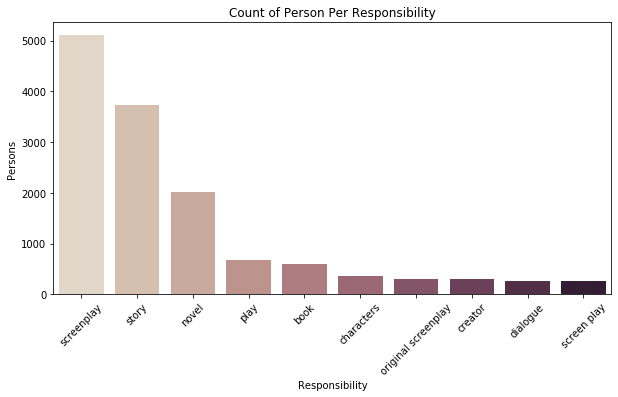

In [18]:
plt.figure(figsize=(10,5))
boom=sns.barplot(x="Responsibility", y='Persons', palette="ch:.25", data=Responsibilities)
plt.xticks(rotation= 45)
plt.xlabel('Responsibility')
plt.ylabel('Persons')
plt.title('Count of Person Per Responsibility')
plt.show()

In [19]:
# Ratings for movies
finalRatings=Movies_df['Rating'].value_counts()[:10]
Ratings=pd.DataFrame({'Rating':finalRatings.index, 'NumberOfMovies':finalRatings.values})
Ratings

,Rating,NumberOfMovies
0,6.2/10,676
1,6.8/10,650
2,6.4/10,649
3,6.6/10,613
4,6.3/10,595
5,6.5/10,573
6,7.0/10,566
7,6.9/10,563
8,6.7/10,554
9,6.1/10,542


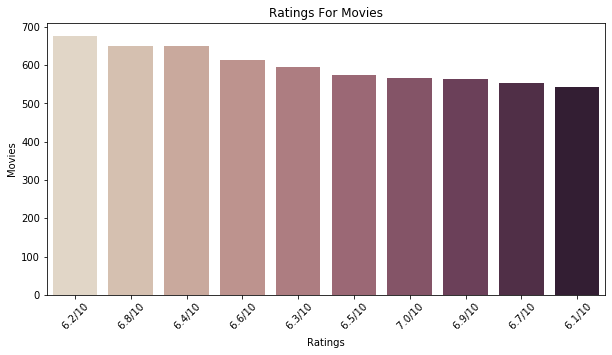

In [20]:
plt.figure(figsize=(10,5))
boom=sns.barplot(x="Rating", y='NumberOfMovies', palette="ch:.25", data=Ratings)
plt.xticks(rotation= 45)
plt.xlabel('Ratings')
plt.ylabel('Movies')
plt.title('Ratings For Movies')
plt.show()

In [21]:
# Rating Source for movies
Movies_df['RatingSource'] = Movies_df['RatingSource'].apply(lambda  x : x.strip()) 
Ratingsource=Movies_df['RatingSource'].value_counts()
Ratingsource=pd.DataFrame({'RatingSource':Ratingsource.index, 'NumberOfMovies':Ratingsource.values})
Ratingsource

,RatingSource,NumberOfMovies
0,Internet Movie Database,18871
1,Rotten Tomatoes,25


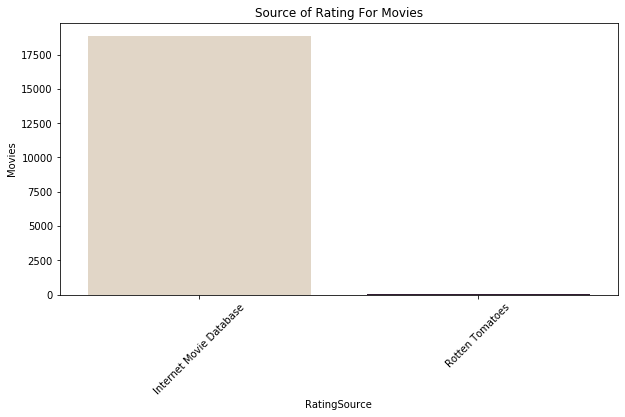

In [22]:
plt.figure(figsize=(10,5))
boom=sns.barplot(x="RatingSource", y='NumberOfMovies', palette="ch:.25", data=Ratingsource)
plt.xticks(rotation= 45)
plt.xlabel('RatingSource')
plt.ylabel('Movies')
plt.title('Source of Rating For Movies')
plt.show()

The total number of movies with  Animation = 1338


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


The total number of movies with  Adventure = 899
The total number of movies with  Comedy = 3899
The total number of movies with  Drama = 4574
The total number of movies with  Western = 327
The total number of movies with  Thriller = 233
The total number of movies with  Crime = 1105
The total number of movies with  Biography = 462
The total number of movies with  Short = 1297
The total number of movies with  Action = 2196
The total number of movies with  Fantasy = 95
The total number of movies with  Romance = 172
The total number of movies with  Family = 308
The total number of movies with  Horror = 706
The total number of movies with  Musical = 124
The total number of movies with  Documentary = 598
The total number of movies with  Adult = 162
The total number of movies with  Mystery = 176
The total number of movies with  Film-Noir = 6
The total number of movies with  Sci-Fi = 101
The total number of movies with  War = 28


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


The total number of movies with  History = 15
The total number of movies with  Music = 185
The total number of movies with  Game-Show = 1
The total number of movies with  Sport = 8
The total number of movies with  News = 2
The total number of movies with  Talk-Show = 2
The total number of movies with  Reality-TV = 1


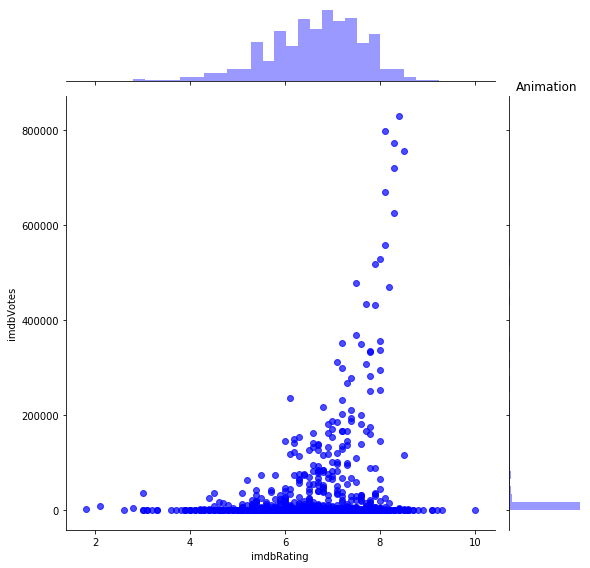

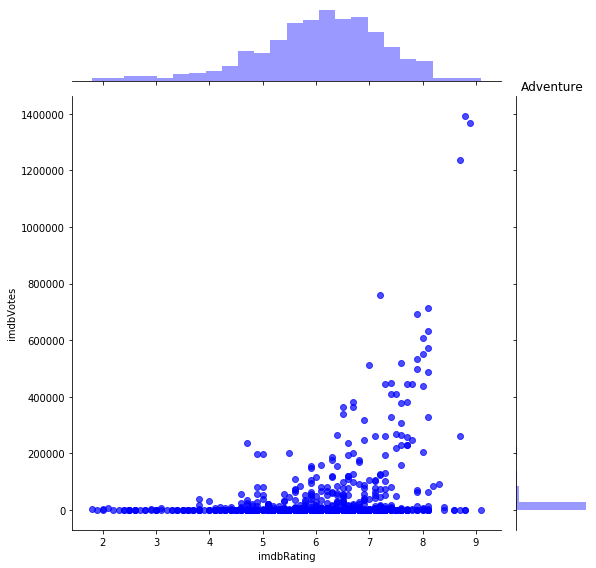

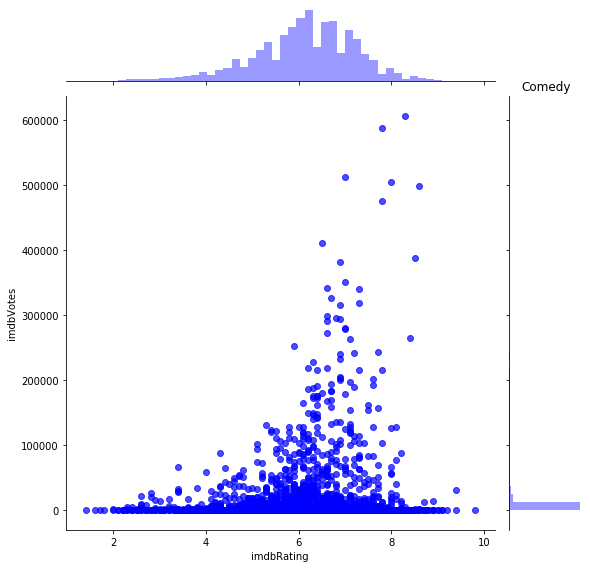

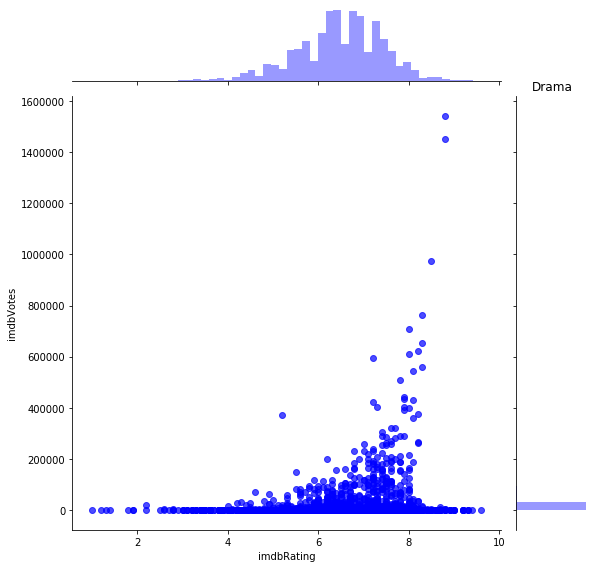

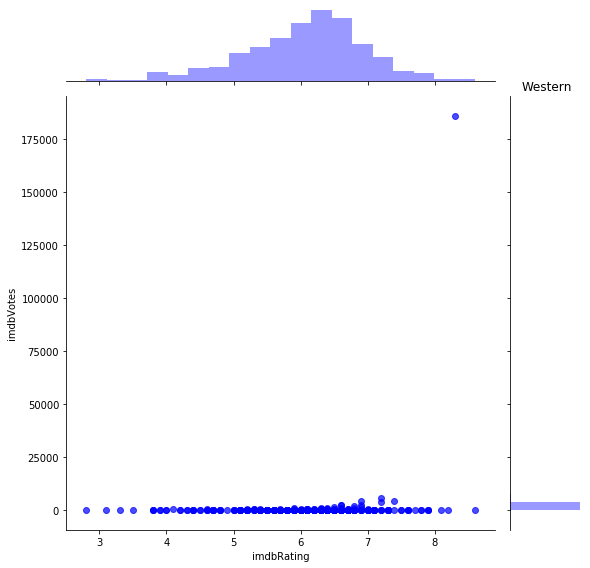

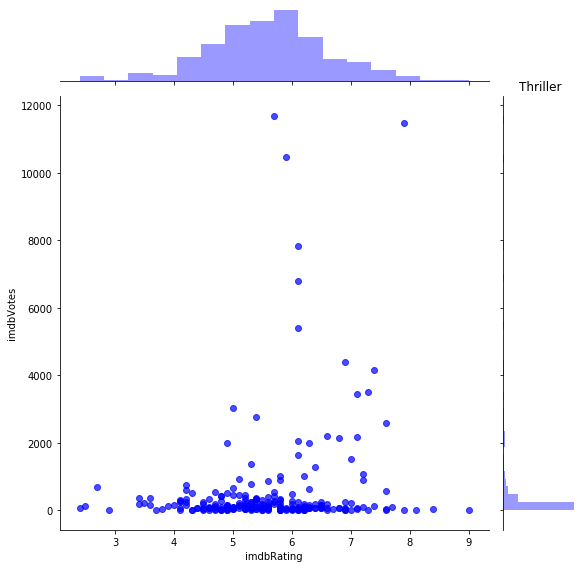

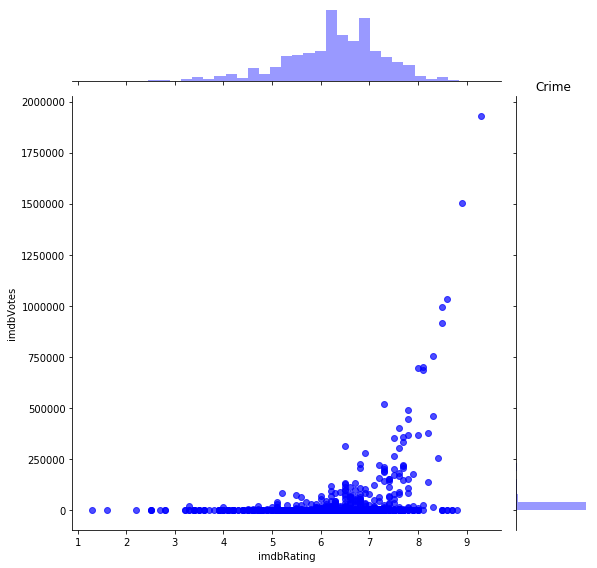

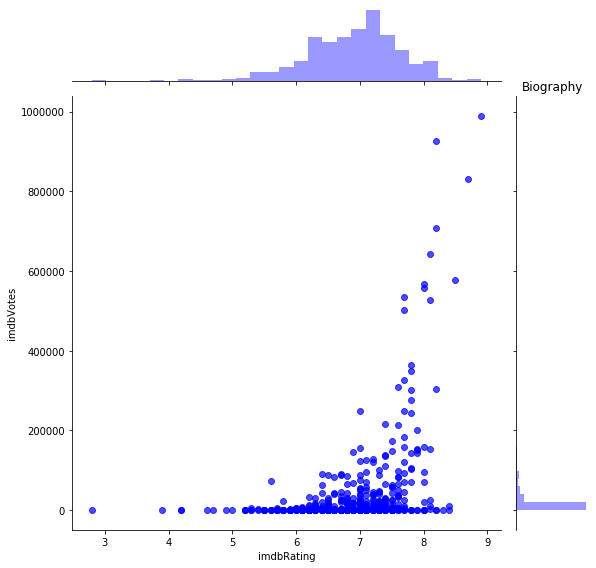

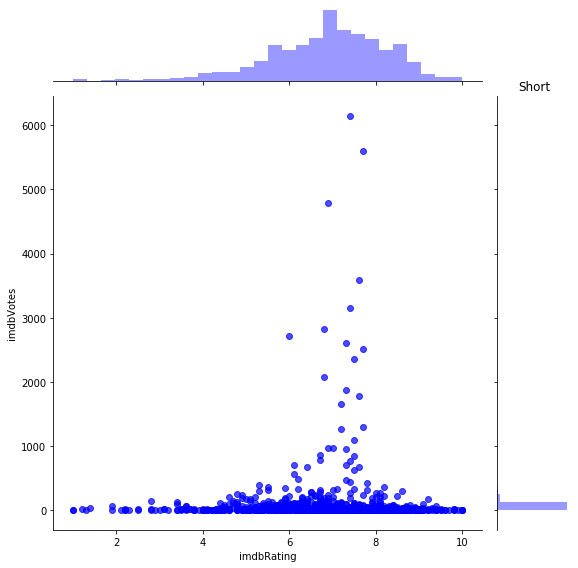

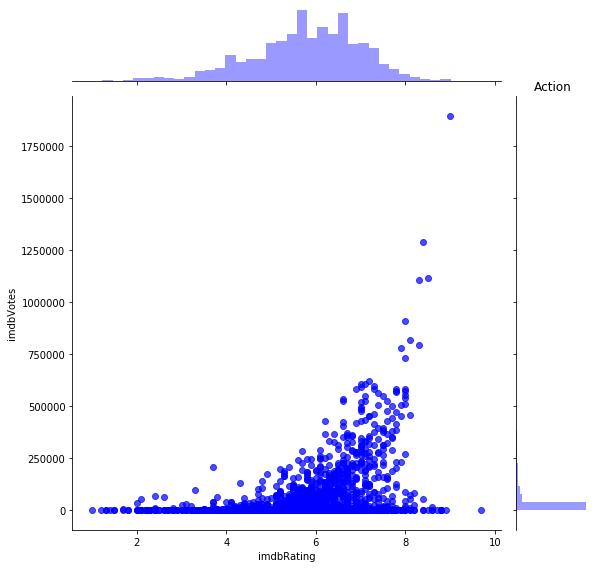

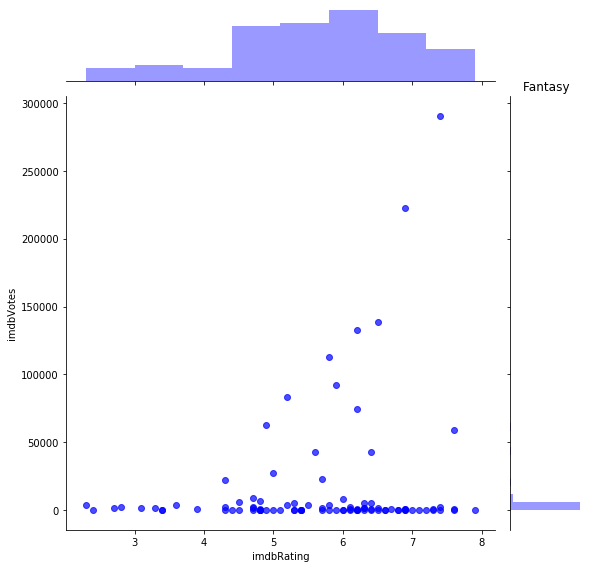

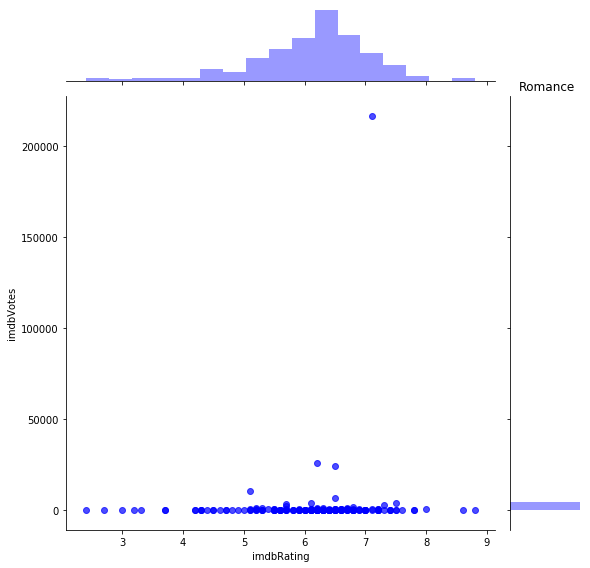

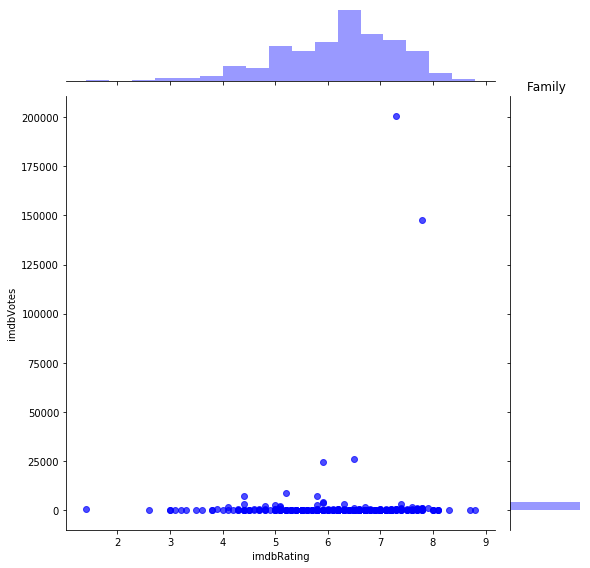

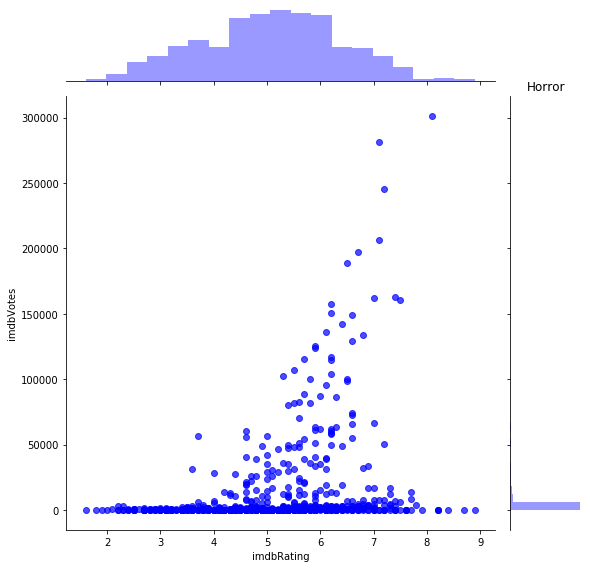

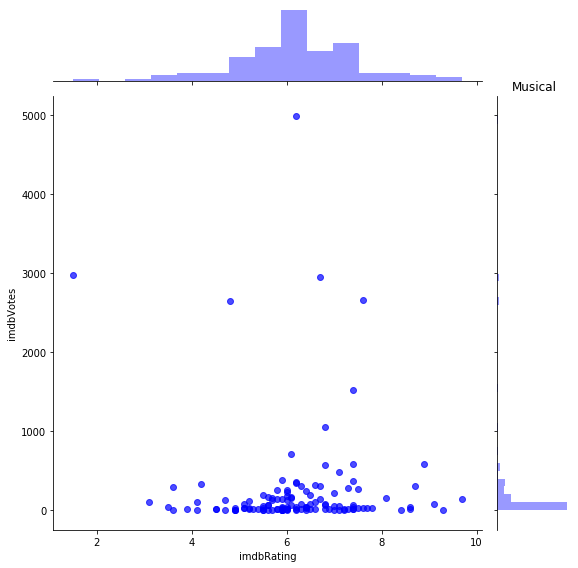

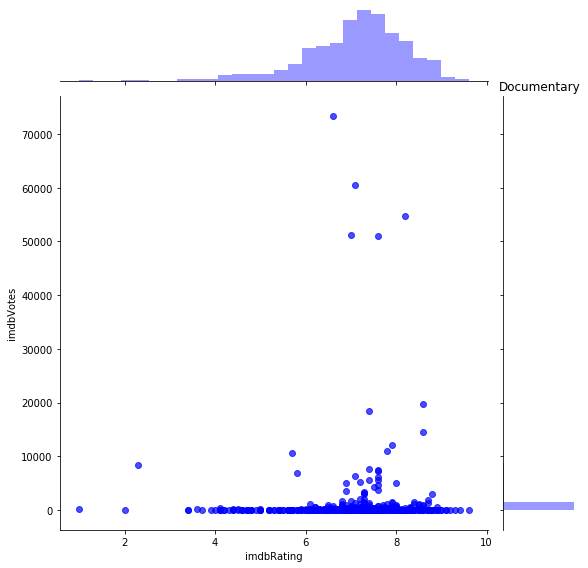

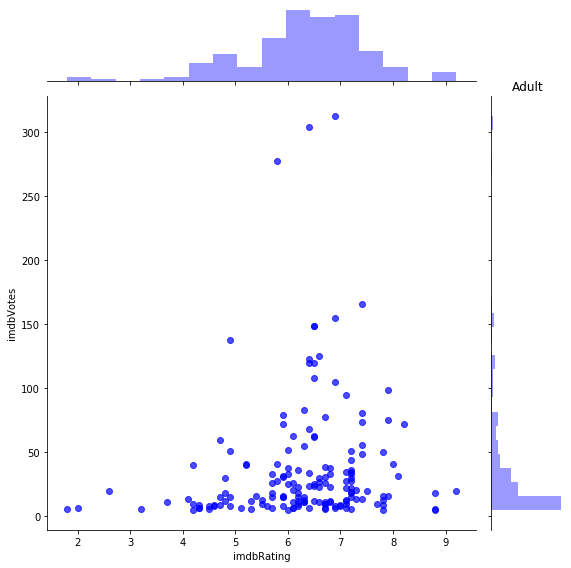

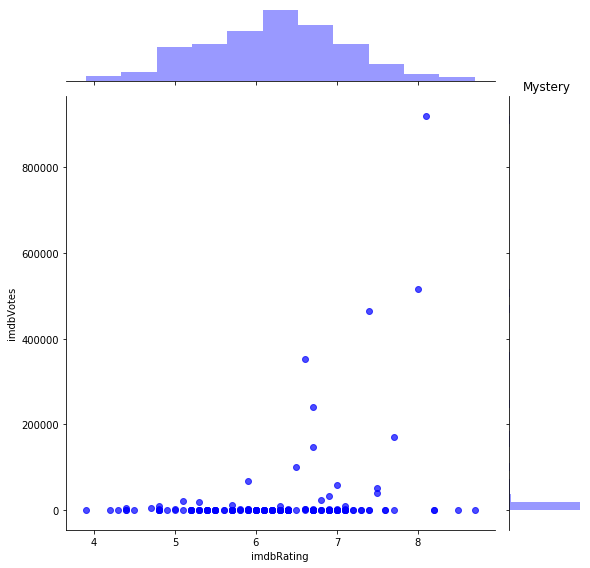

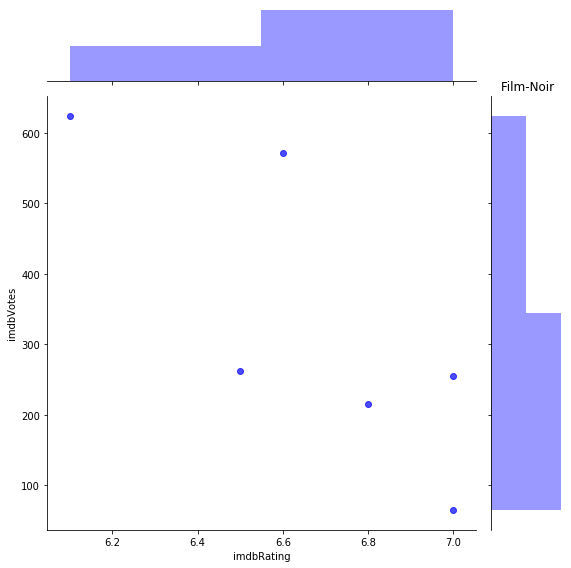

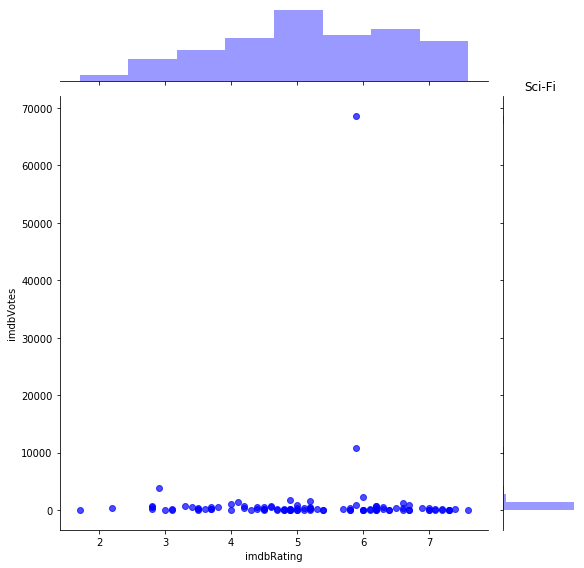

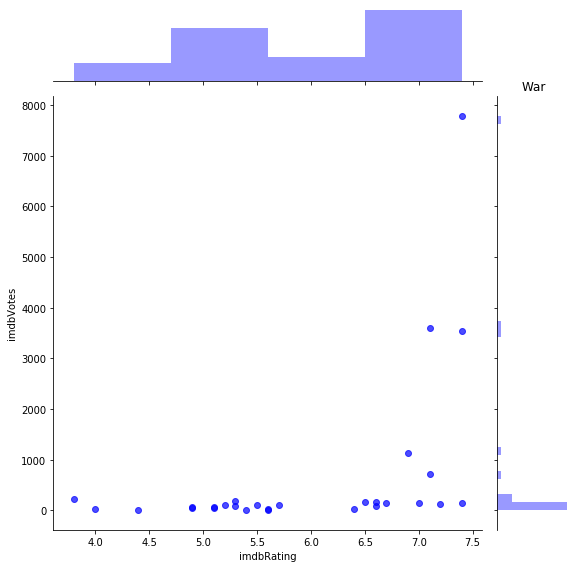

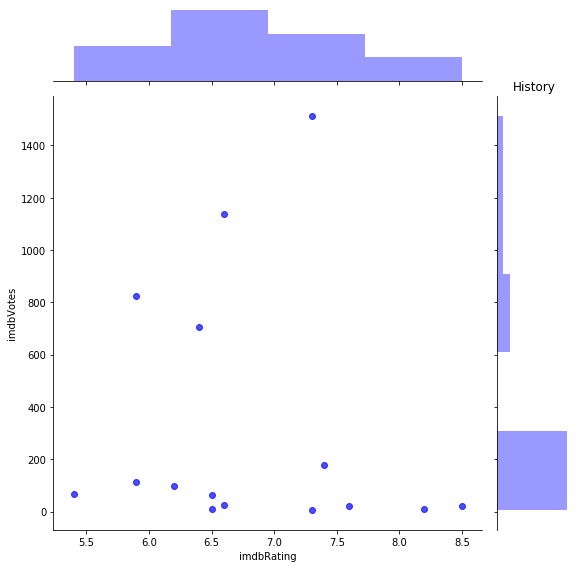

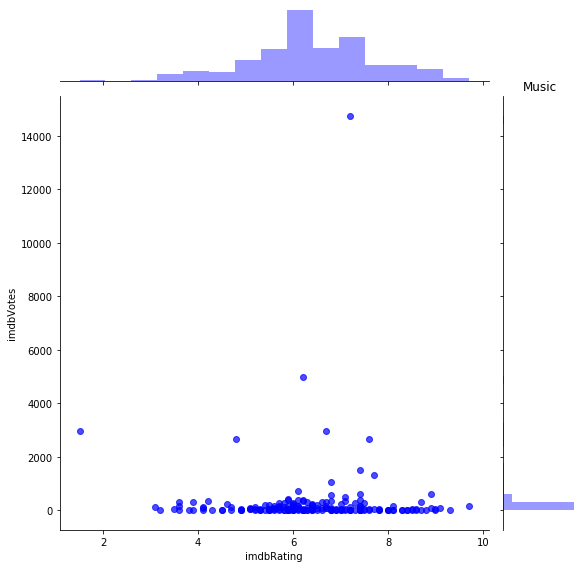

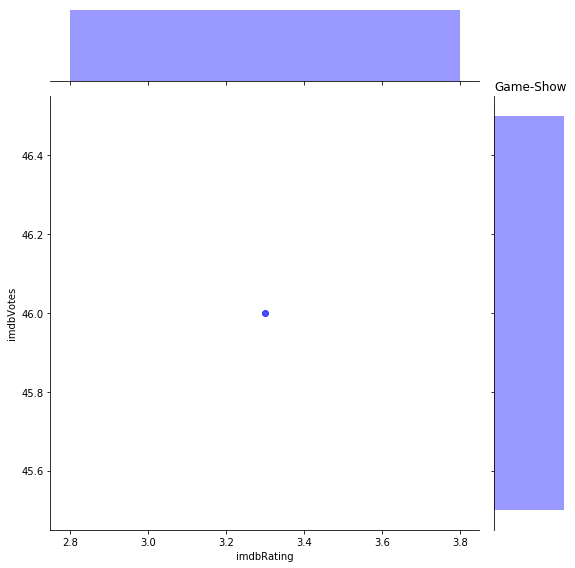

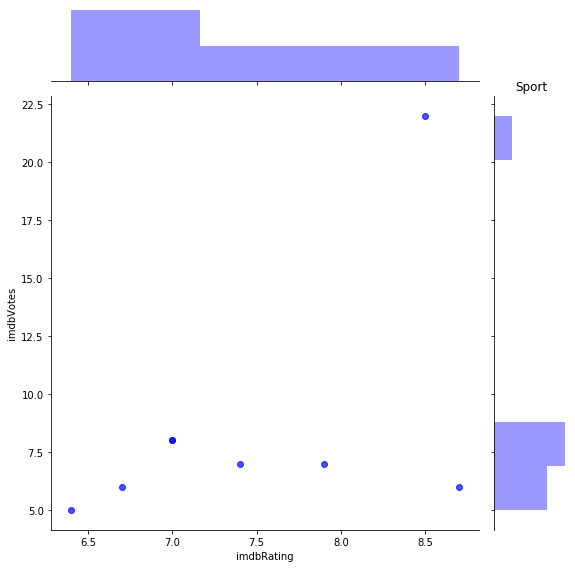

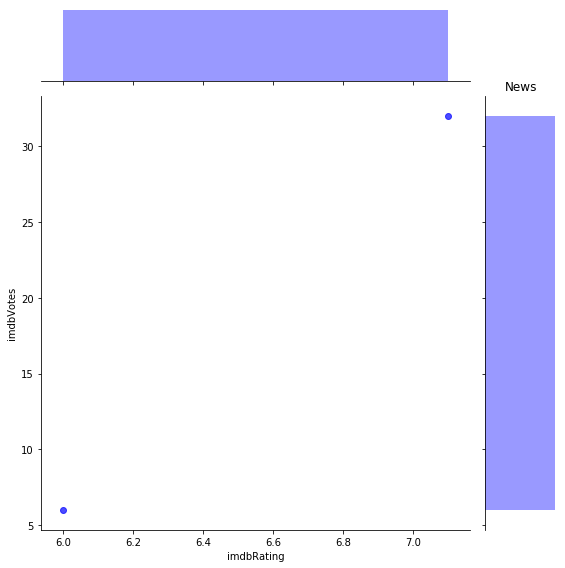

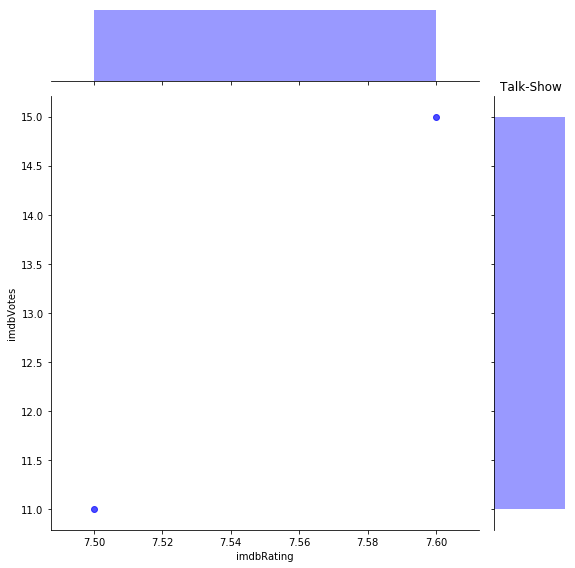

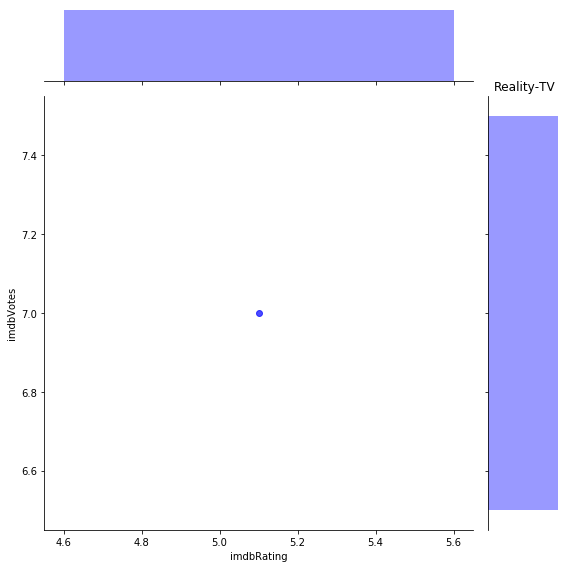

In [23]:
# Genre Analysis
seperate_genre=Movies_df['Genre'].unique()
for genre in seperate_genre:
    df = Movies_df['Genre'].str.contains(genre).fillna(False)
    print('The total number of movies with ',genre,'=',len(Movies_df[df]))
#     f, ax = plt.subplots(figsize=(10, 6))
#     sns.countplot(x='Year', data=Movies_df[df], palette="Greens_d");
#     plt.title(genre)
    compare_movies_rating = ['imdbVotes']
    for compare in compare_movies_rating:
        sns.jointplot(x='imdbRating', y=compare, data=Movies_df[df], alpha=0.7, color='b', size=8)
        plt.title(genre)

In [24]:
# Number of Movies per Genre
Genre=Movies_df['Genre'].value_counts()
Genres=pd.DataFrame({'Genre':Genre.index, 'NumberOfMovies':Genre.values})
Genres

,Genre,NumberOfMovies
0,Drama,4574
1,Comedy,3899
2,Action,2196
3,Animation,1338
4,Short,1297
5,Crime,1105
6,Adventure,899
7,Horror,706
8,Documentary,598
9,Biography,462


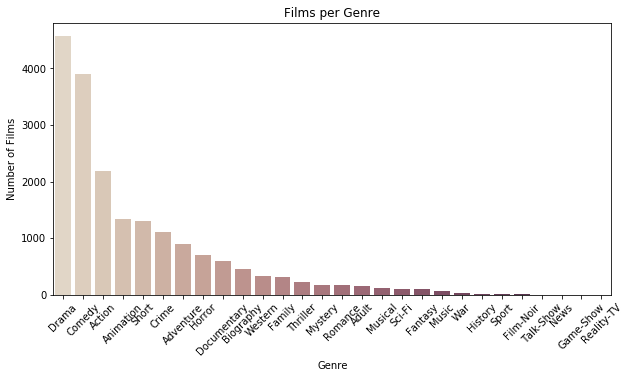

In [25]:
plt.figure(figsize=(10,5))
boom=sns.barplot(x="Genre", y='NumberOfMovies', palette="ch:.25", data=Genres)
plt.xticks(rotation= 45)
plt.xlabel('Genre')
plt.ylabel('Number of Films')
plt.title('Films per Genre')
plt.show()

In [26]:
# Movies per director
finaldirectors=Movies_df['Director'].value_counts()[:10]
DoubleFilteredDirectors=pd.DataFrame({'Director':finaldirectors.index, 'NumberOfMoviesProduced':finaldirectors.values})
DoubleFilteredDirectors

,Director,NumberOfMoviesProduced
0,Sam Newfield,33
1,William Beaudine,26
2,Richard Thorpe,25
3,Friz Freleng,25
4,Chuck Jones,24
5,Lew Landers,23
6,Seymour Kneitel,22
7,Michael Curtiz,21
8,John Ford,21
9,William A. Seiter,20


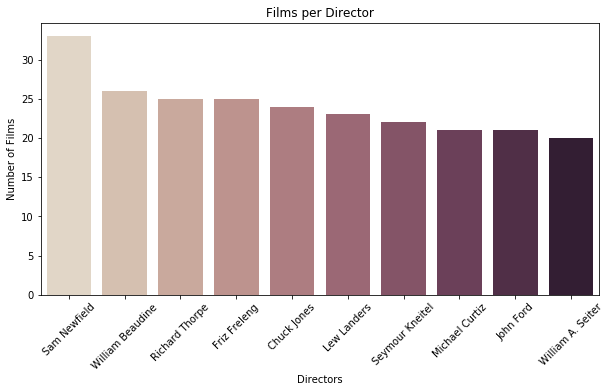

In [27]:
plt.figure(figsize=(10,5))
boom=sns.barplot(x="Director", y='NumberOfMoviesProduced', palette="ch:.25", data=DoubleFilteredDirectors)
plt.xticks(rotation= 45)
plt.xlabel('Directors')
plt.ylabel('Number of Films')
plt.title('Films per Director')
plt.show()

Text(0.5, 1.0, 'TOP 10 DIRECTORS OF MOVIES')

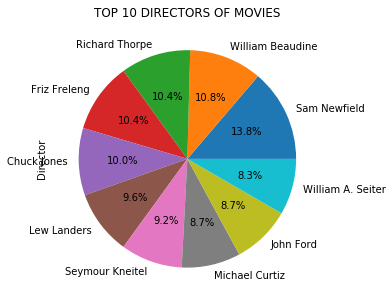

In [28]:
Movies_df.Director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,5))
plt.title('TOP 10 DIRECTORS OF MOVIES')

Text(0.5, 1.0, 'TOP 10 runtime OF MOVIES')

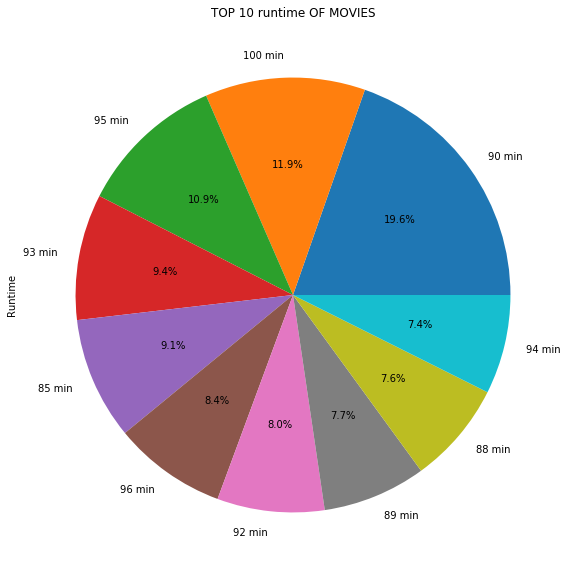

In [29]:
#Top 10 runtime of movies
Movies_df.Runtime.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP 10 runtime OF MOVIES')

In [30]:
# Number of Movies per Year
Year=Movies_df['Year'].value_counts()[:10]
Year=pd.DataFrame({'Year':Year.index, 'NumberOfMovies':Year.values})
Year

,Year,NumberOfMovies
0,2010,540
1,2009,532
2,2011,518
3,2008,499
4,2012,471
5,2013,467
6,2014,415
7,2007,372
8,2015,351
9,2016,323


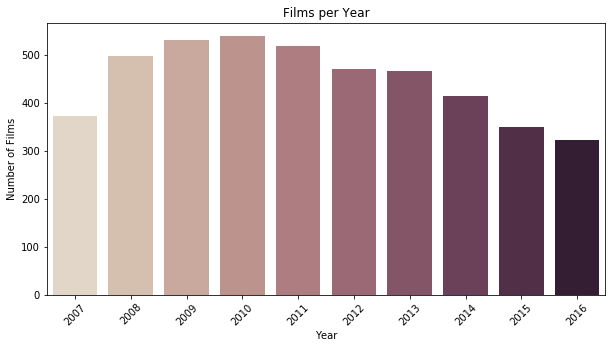

In [31]:
plt.figure(figsize=(10,5))
boom=sns.barplot(x="Year", y='NumberOfMovies', palette="ch:.25", data=Year)
plt.xticks(rotation= 45)
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.title('Films per Year')
plt.show()

In [32]:
#top 10 imdbRating movies 
Sortedrating= Movies_df.sort_values(['Rating'], ascending=False)
Sortedrating.head(10)

,Actors,imdbID,Person,Responsibility,Rating,RatingSource,Genre,Awards,Country,DVD,...,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbRating,imdbVotes
151645,Michael Caine,tt0468569,Jonathan Nolan,screenplay,9.0/10,Internet Movie Database,Action,Won 2 Oscars. Another 151 wins & 154 nominations.,"USA, UK",9-Dec-08,...,Warner Bros. Pictures/Legendary,PG-13,18-Jul-08,152 min,The Dark Knight,movie,http://thedarkknight.warnerbros.com/,2008,9.0,1896843.0
184736,Caroline Goodall,tt0108052,Thomas Keneally,book,8.9/10,Internet Movie Database,Biography,Won 7 Oscars. Another 81 wins & 45 nominations.,USA,9-Mar-04,...,Universal Pictures,R,4-Feb-94,195 min,Schindler's List,movie,http://www.schindlerslist.com,1993,8.9,989411.0
186539,John Travolta,tt0110912,Quentin Tarantino,stories,8.9/10,Internet Movie Database,Crime,Won 1 Oscar. Another 60 wins & 68 nominations.,USA,19-May-98,...,Miramax Films,R,14-Oct-94,154 min,Pulp Fiction,movie,NaN,1994,8.9,1501400.0
138628,David Aston,tt0167260,J.R.R. Tolkien,novel,8.9/10,Internet Movie Database,Adventure,Won 11 Oscars. Another 197 wins & 123 nominati...,"USA, New Zealand",25-May-04,...,New Line Cinema,PG-13,17-Dec-03,201 min,The Lord of the Rings: The Return of the King,movie,http://www.lordoftherings.net/,2003,8.9,1367235.0
197794,Zach Grenier,tt0137523,Chuck Palahniuk,novel,8.8/10,Internet Movie Database,Drama,Nominated for 1 Oscar. Another 10 wins & 34 no...,"USA, Germany",6-Jun-00,...,20th Century Fox,R,15-Oct-99,139 min,Fight Club,movie,http://www.foxmovies.com/fightclub/,1999,8.8,1541872.0
186243,Michael Conner Humphreys,tt0109830,Winston Groom,novel,8.8/10,Internet Movie Database,Drama,Won 6 Oscars. Another 39 wins & 66 nominations.,USA,28-Aug-01,...,Paramount Pictures,PG-13,6-Jul-94,142 min,Forrest Gump,movie,http://www.paramount.com/movies/forrest-gump/,1994,8.8,1449570.0
134224,Sala Baker,tt0120737,J.R.R. Tolkien,novel,8.8/10,Internet Movie Database,Adventure,Won 4 Oscars. Another 113 wins & 123 nominations.,"New Zealand, USA",6-Aug-02,...,New Line Cinema,PG-13,19-Dec-01,178 min,The Lord of the Rings: The Fellowship of the Ring,movie,http://www.lordoftherings.net/film/trilogy/the...,2001,8.8,1392593.0
136333,Sala Baker,tt0167261,J.R.R. Tolkien,novel,8.7/10,Internet Movie Database,Adventure,Won 2 Oscars. Another 118 wins & 138 nominations.,"USA, New Zealand",26-Aug-03,...,New Line Cinema,PG-13,18-Dec-02,179 min,The Lord of the Rings: The Two Towers,movie,http://www.lordoftherings.net/,2002,8.7,1237719.0
180931,Lorraine Bracco,tt0099685,Nicholas Pileggi,book,8.7/10,Internet Movie Database,Biography,Won 1 Oscar. Another 43 wins & 37 nominations.,USA,26-Mar-97,...,Warner Bros.,R,21-Sep-90,146 min,Goodfellas,movie,NaN,1990,8.7,830904.0
138538,Ed Stoppard,tt0253474,Ronald Harwood,screenplay,8.5/10,Internet Movie Database,Biography,Won 3 Oscars. Another 52 wins & 73 nominations.,"France, Poland, Germany, UK, USA",27-May-03,...,Focus Features,R,28-Mar-03,150 min,The Pianist,movie,http://www.thepianistmovie.com/,2002,8.5,577163.0


In [33]:
# low rated movies
lowratedmovies= Movies_df.query('(imdbRating > 0) & (imdbRating < 3.0)')
lowratedmovies.head()

,Actors,imdbID,Person,Responsibility,Rating,RatingSource,Genre,Awards,Country,DVD,...,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbRating,imdbVotes
345,Molly Glynn,tt2362110,Raza Siddiqui,story,2.8/10,Internet Movie Database,Short,NaN,USA,NaN,...,NaN,NaN,24-Jan-13,10 min,Ctrl + Life + Delete,movie,NaN,2013,2.8,8.0
673,Johann John Jean,tt0462308,Jean-Claude La Marre,story,2.5/10,Internet Movie Database,Horror,NaN,USA,15-Aug-06,...,NaN,R,6-Jan-06,79 min,VooDoo Curse: The Giddeh,movie,NaN,2006,2.5,108.0
2080,Oliver Rayon,tt2837602,Al Bravo,story,2.7/10,Internet Movie Database,Horror,NaN,USA,10-Sep-13,...,Lightyear Entertainment,NR,10-Sep-13,88 min,Reality Terror Night,movie,https://www.facebook.com/realityterrornight,2013,2.7,74.0
2944,Cadu Fávero,tt1248882,Renato Aragão,story,1.4/10,Internet Movie Database,Comedy,1 nomination.,Brazil,NaN,...,NaN,NaN,20-Jun-08,102 min,The Warrior Didi and the Ninja Lili,movie,NaN,2008,1.4,115.0
2945,Toneey Acevedo,tt1409090,Josh Evans,screenwriter,2.4/10,Internet Movie Database,Action,NaN,USA,30-Jun-09,...,NaN,NaN,2-May-09,76 min,Everybody Dies,movie,NaN,2009,2.4,208.0


In [34]:
print('number of low rated movies :')
len(lowratedmovies)

number of low rated movies :


252

In [35]:
#medium rated movies
mediumratedmovies= Movies_df.query('(imdbRating > 3.0) & (imdbRating < 7.0)')
mediumratedmovies.head()

,Actors,imdbID,Person,Responsibility,Rating,RatingSource,Genre,Awards,Country,DVD,...,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbRating,imdbVotes
0,Seth Green,tt0206367,Judy Rothman Rofé,screenplay,5.0/10,Internet Movie Database,Animation,1 nomination.,USA,31-Jul-01,...,Columbia Pictures,G,1-Mar-01,75 min,The Trumpet of the Swan,movie,NaN,2001,5.0,813.0
22,Grant Mitchell,tt0025597,Franz Schulz,story,6.8/10,Internet Movie Database,Comedy,NaN,USA,NaN,...,NaN,NaN,1-Sep-34,70 min,One Exciting Adventure,movie,NaN,1934,6.8,10.0
24,Madeleine Potter,tt0098347,Tama Janowitz,based on the stories by,5.4/10,Internet Movie Database,Drama,NaN,USA,26-Jul-05,...,Sony Pictures Home Entertainment,R,1-Mar-89,124 min,Slaves of New York,movie,NaN,1989,5.4,777.0
32,Virginia Herrick,tt0042967,Daniel B. Ullman,original screenplay,5.9/10,Internet Movie Database,Western,NaN,USA,NaN,...,NaN,APPROVED,20-Oct-50,55 min,Silver Raiders,movie,NaN,1950,5.9,7.0
33,Thomas Baptiste,tt0069796,Russ Meyer,screenplay,5.1/10,Internet Movie Database,Thriller,NaN,USA,NaN,...,NaN,R,10-Aug-73,82 min,Black Snake,movie,NaN,1973,5.1,460.0


In [36]:
print('number of medium rated movies :')
len(mediumratedmovies)

number of medium rated movies :


13162

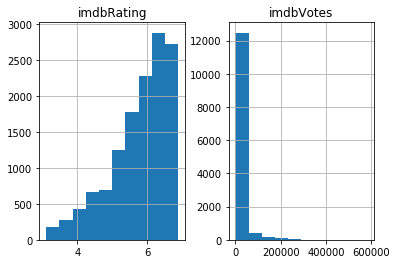

In [37]:
# mediumrated Movies
mediumratedmovies.hist()
plt.show()

In [38]:
#high rated movies
highratedmovies= Movies_df.query('(imdbRating > 7.0) & (imdbRating < 10.0)')
highratedmovies.head()

,Actors,imdbID,Person,Responsibility,Rating,RatingSource,Genre,Awards,Country,DVD,...,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbRating,imdbVotes
18,Richard Jaeckel,tt0046287,Norman Reilly Raine,story,7.6/10,Internet Movie Database,Adventure,NaN,USA,NaN,...,NaN,Approved,1-Feb-54,85 min,Sea of Lost Ships,movie,NaN,1953,7.6,16.0
45,Piyakarn Butprasert,tt1621642,Benjamaporn Srabua,screenplay,7.3/10,Internet Movie Database,Comedy,1 win & 2 nominations.,Thailand,NaN,...,NaN,NaN,15-Oct-09,126 min,Bangkok Traffic (Love) Story,movie,NaN,2009,7.3,1121.0
51,Yari Gugliucci,tt2391934,Melania Romanelli,screenwriter,7.5/10,Internet Movie Database,Biography,NaN,Italy,NaN,...,NaN,NaN,23-Sep-12,NaN,Caruso,movie,NaN,2012,7.5,6.0
73,Rachel Austin,tt5115318,Sylvia Lancaster,words,8.6/10,Internet Movie Database,Drama,NaN,UK,NaN,...,NaN,NaN,12-Mar-15,45 min,Black Roses: The Killing of Sophie Lancaster,movie,NaN,2015,8.6,13.0
77,Suzi Hofrichter,tt0115892,Julie Salamon,book,7.2/10,Internet Movie Database,Drama,NaN,USA,NaN,...,NaN,NaN,22-Dec-96,93 min,The Christmas Tree,movie,NaN,1996,7.2,292.0


In [39]:
print('number of high rated movies :')
len(highratedmovies)

number of high rated movies :


4778

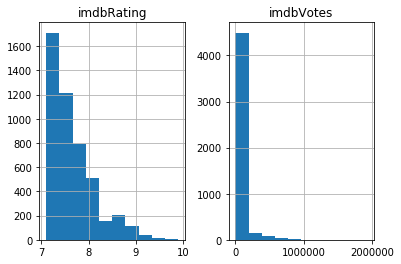

In [40]:
# Highrated Movies
highratedmovies.hist()
plt.show()

In [41]:
# imdbRatings for Movies  
imdbRatings=Movies_df['imdbRating'].value_counts()[:5]
imdbRatings=pd.DataFrame({'imdbRatings':imdbRatings.index, 'NumberOfMovies':imdbRatings.values})
imdbRatings

,imdbRatings,NumberOfMovies
0,6.2,780
1,6.8,740
2,6.4,735
3,6.6,703
4,6.3,694
5,6.5,673
6,6.9,646
7,6.7,642
8,7.0,640
9,6.1,628


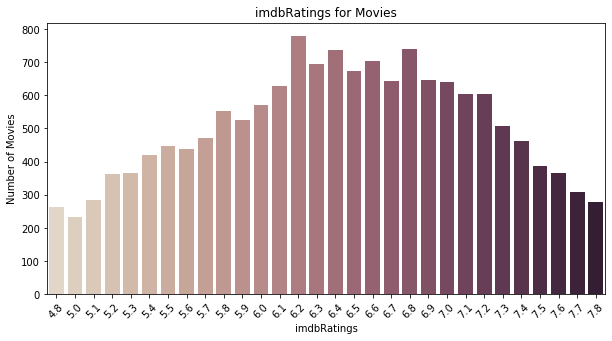

In [42]:
plt.figure(figsize=(10,5))
boom=sns.barplot(x="imdbRatings", y='NumberOfMovies', palette="ch:.25", data=imdbRatings)
plt.xticks(rotation= 45)
plt.xlabel('imdbRatings')
plt.ylabel('Number of Movies')
plt.title('imdbRatings for Movies')
plt.show()

In [43]:
# imdbVotes for Movies  
imdbVotes=Movies_df['imdbVotes'].value_counts()[:10]
imdbVotes=pd.DataFrame({'imdbVotes':imdbVotes.index, 'NumberOfMovies':imdbVotes.values})
imdbVotes

,imdbVotes,NumberOfMovies
0,5.0,420
1,6.0,368
2,7.0,340
3,8.0,313
4,9.0,293
5,11.0,257
6,10.0,256


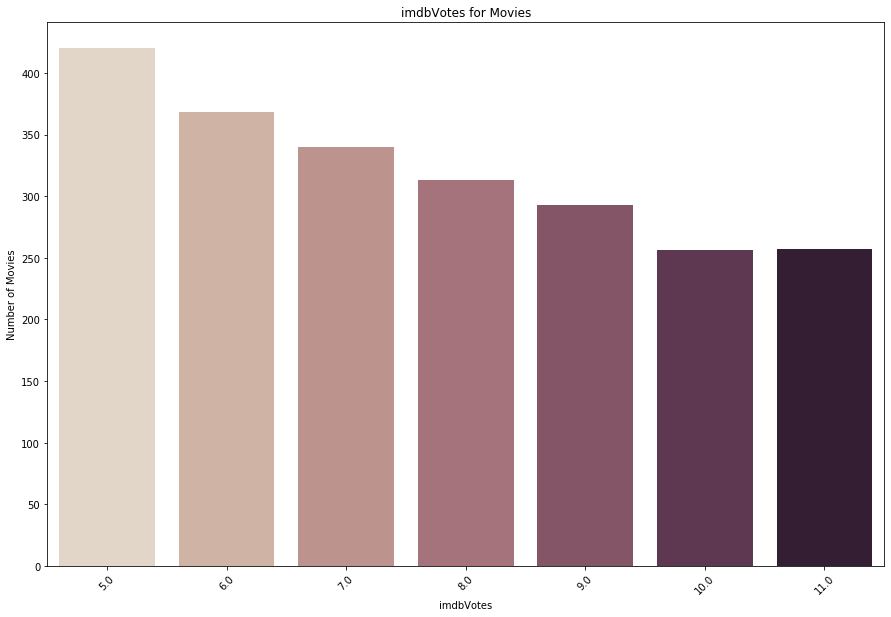

In [44]:
plt.figure(figsize=(15,10))
boom=sns.barplot(x="imdbVotes", y='NumberOfMovies', palette="ch:.25", data=imdbVotes)
plt.xticks(rotation= 45)
plt.xlabel('imdbVotes')
plt.ylabel('Number of Movies')
plt.title('imdbVotes for Movies')
plt.show()

# Data Cleaning

In [45]:
#filling null values of Awards column
Movies_df['Awards']=Movies_df.Awards.fillna(0)
Movies_df['Awards'].isnull().sum()

0

In [46]:
#drop Columns which are not necessary
Movies_df.drop(['DVD', 'Poster', 'Plot', 'Website','Rated','Production','Title','Type','Person'], axis = 1, inplace = True)


In [47]:
# removing null values of required attribute
Movies_df=Movies_df[Movies_df['Country'].notnull()]
Movies_df=Movies_df[Movies_df['Director'].notnull()]
Movies_df=Movies_df[Movies_df['Language'].notnull()]
Movies_df=Movies_df[Movies_df['Released'].notnull()]
Movies_df=Movies_df[Movies_df['Runtime'].notnull()]
Movies_df=Movies_df[Movies_df['imdbRating'].notnull()]
Movies_df=Movies_df[Movies_df['imdbVotes'].notnull()]

In [48]:
Movies_df.shape

(16015, 15)

In [49]:
Movies_df['Awards']=Movies_df.Awards.astype(str)

In [50]:
x=Movies_df['Awards']
splits=split(x,' ')
splits.head(15)

0                 [1, nomination.]
18                             [0]
22                             [0]
24                             [0]
32                             [0]
33                             [0]
39                             [0]
40                             [0]
41                             [0]
45    [1, win, &, 2, nominations.]
53                             [0]
68                      [2, wins.]
71                             [0]
73                             [0]
75                             [0]
Name: Awards, dtype: object

In [51]:
l=list(splits)
Awards=[]
count=0
for i in l:
    total=0
    j=0
    for j in range(len(i)):
        if i[j].isdigit()==True:
            total=total+int(i[j])
            j+=1
    Awards.append(total)
    
print(Awards)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 4, 9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 2, 0, 1, 7, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 1, 52, 0, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 0, 8, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 13, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 2, 1, 0, 8, 9, 0, 0, 0, 1, 0, 0, 11, 17, 5, 0, 0, 0, 0, 4, 11, 6, 4, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 30, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 18, 0, 0, 0, 0, 1, 11, 0, 1, 16, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 10, 1, 0, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 102, 56, 1, 0, 0, 6, 0, 2, 2, 0, 0, 0, 0, 0, 0, 4, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 4, 0, 0, 3, 1, 0, 1

In [52]:
df=pd.DataFrame(data=Awards,columns=['Awards'])
df.head()

,Awards
0,1
1,0
2,0
3,0
4,0


In [53]:
x=Movies_df['Runtime']
splits=split(x,' ')
splits.head(15)

0      [75, min]
18     [85, min]
22     [70, min]
24    [124, min]
32     [55, min]
33     [82, min]
39     [56, min]
40     [87, min]
41     [73, min]
45    [126, min]
53     [90, min]
68    [150, min]
71     [97, min]
73     [45, min]
75     [89, min]
Name: Runtime, dtype: object

In [54]:
l=list(splits)
Runtime=[]
for i in l:
    for j in range(len(i)):
        if i[j].isdigit()==True:
             Runtime.append(i[j])
    
print(Runtime)

['75', '85', '70', '124', '55', '82', '56', '87', '73', '126', '90', '150', '97', '45', '89', '93', '85', '60', '97', '110', '20', '75', '95', '48', '112', '64', '98', '96', '18', '63', '90', '30', '7', '44', '12', '60', '103', '87', '62', '96', '96', '80', '97', '7', '119', '10', '77', '85', '98', '86', '23', '103', '40', '107', '225', '84', '90', '55', '61', '84', '93', '89', '64', '62', '106', '92', '74', '91', '105', '88', '74', '87', '14', '88', '30', '95', '5', '67', '71', '106', '79', '98', '65', '89', '72', '127', '84', '114', '68', '14', '134', '86', '80', '20', '90', '70', '72', '92', '108', '93', '11', '105', '140', '86', '100', '61', '8', '120', '96', '96', '85', '102', '74', '96', '92', '89', '90', '126', '95', '96', '85', '109', '108', '15', '90', '70', '19', '26', '94', '95', '87', '59', '90', '126', '104', '95', '75', '94', '100', '95', '26', '73', '75', '8', '93', '99', '6', '95', '100', '106', '81', '97', '150', '11', '85', '68', '90', '125', '80', '103', '105', '47',

In [55]:
df1=pd.DataFrame(data=Runtime,columns=['Runtime'])
df1.head()

,Runtime
0,75
1,85
2,70
3,124
4,55


In [56]:
x=Movies_df['Rating']
splits=split(x,'/')
splits.head(10)

0     [ 5.0, 10]
18    [ 7.6, 10]
22    [ 6.8, 10]
24    [ 5.4, 10]
32    [ 5.9, 10]
33    [ 5.1, 10]
39    [ 4.8, 10]
40    [ 6.8, 10]
41    [ 3.7, 10]
45    [ 7.3, 10]
Name: Rating, dtype: object

In [57]:
l=list(splits)
Rating=[]
z=[]
for i in l:
    total=0
    j=0
    for j in range(len(i)):
        if i[j]=='10' or i[j]=='100':
             z.append(i[j])
        else:
            Rating.append(i[j])
    

print(Rating)

[' 5.0', ' 7.6', ' 6.8', ' 5.4', ' 5.9', ' 5.1', ' 4.8', ' 6.8', ' 3.7', ' 7.3', ' 6.9', ' 6.9', ' 3.5', ' 8.6', ' 4.1', ' 7.2', ' 5.4', ' 5.3', ' 7.2', ' 7.1', ' 6.6', ' 5.8', ' 5.4', ' 5.5', ' 6.6', ' 7.0', ' 4.3', ' 6.2', ' 8.4', ' 6.4', ' 7.5', ' 8.5', ' 6.5', ' 6.0', ' 7.1', ' 5.3', ' 5.7', ' 7.3', ' 3.7', ' 5.3', ' 6.9', ' 7.1', ' 6.3', ' 6.9', ' 5.8', ' 2.8', ' 5.9', ' 5.8', ' 6.0', ' 5.7', ' 8.3', ' 5.4', ' 5.9', ' 6.3', ' 4.4', ' 6.4', ' 4.9', ' 7.1', ' 5.7', ' 3.4', ' 3.2', ' 7.2', ' 7.9', ' 4.7', ' 6.8', ' 7.1', ' 7.2', ' 4.9', ' 5.8', ' 7.1', ' 6.4', ' 6.7', ' 6.1', ' 7.4', ' 4.6', ' 5.6', ' 7.0', ' 6.0', ' 7.3', ' 5.3', ' 2.5', ' 6.8', ' 5.4', ' 7.3', ' 6.9', ' 7.2', ' 6.6', ' 7.7', ' 6.8', ' 6.6', ' 8.6', ' 3.2', ' 4.3', ' 7.5', ' 5.4', ' 6.1', ' 7.0', ' 5.7', ' 6.7', ' 5.6', ' 5.5', ' 5.8', ' 3.3', ' 6.3', ' 6.6', ' 4.3', ' 6.9', ' 6.8', ' 5.8', ' 4.6', ' 5.6', ' 7.2', ' 7.0', ' 6.6', ' 3.1', ' 4.8', ' 6.9', ' 6.2', ' 5.8', ' 6.5', ' 6.2', ' 7.0', ' 7.0', ' 7.6', ' 6.8',

In [58]:
df2=pd.DataFrame(Rating,columns=['Rating'])
df2.head()

,Rating
0,5.0
1,7.6
2,6.8
3,5.4
4,5.9


In [59]:
Movies_df['Awards']=df['Awards'].values

In [60]:
Movies_df['Runtime']=df1['Runtime'].values

In [61]:
Movies_df['Rating']=df2['Rating'].values

In [62]:
Movies_df.shape

(16015, 15)

In [63]:
Movies_df.head()

,Actors,imdbID,Responsibility,Rating,RatingSource,Genre,Awards,Country,Director,Language,Released,Runtime,Year,imdbRating,imdbVotes
0,Seth Green,tt0206367,screenplay,5.0,Internet Movie Database,Animation,1,USA,"Terry L. Noss, Richard Rich",English,1-Mar-01,75,2001,5.0,813.0
18,Richard Jaeckel,tt0046287,story,7.6,Internet Movie Database,Adventure,0,USA,Joseph Kane,English,1-Feb-54,85,1953,7.6,16.0
22,Grant Mitchell,tt0025597,story,6.8,Internet Movie Database,Comedy,0,USA,Ernst L. Frank,English,1-Sep-34,70,1934,6.8,10.0
24,Madeleine Potter,tt0098347,based on the stories by,5.4,Internet Movie Database,Drama,0,USA,James Ivory,English,1-Mar-89,124,1989,5.4,777.0
32,Virginia Herrick,tt0042967,original screenplay,5.9,Internet Movie Database,Western,0,USA,Wallace Fox,English,20-Oct-50,55,1950,5.9,7.0


In [64]:
Movies_df.tail()

,Actors,imdbID,Responsibility,Rating,RatingSource,Genre,Awards,Country,Director,Language,Released,Runtime,Year,imdbRating,imdbVotes
197986,Oliver Platt,tt0182789,"short story ""The Bicentennial Man""",6.8,Internet Movie Database,Comedy,10,"USA, Germany",Chris Columbus,English,17-Dec-99,132,1999,6.8,97099.0
198022,Jonathan Lipnicki,tt0164912,book,5.9,Internet Movie Database,Adventure,21,"Germany, USA",Rob Minkoff,"English, Dutch",17-Dec-99,84,1999,5.9,106665.0
198049,James Woods,tt0146838,screen story,6.8,Internet Movie Database,Drama,12,USA,Oliver Stone,English,22-Dec-99,162,1999,6.8,103302.0
198073,Tony Shalhoub,tt0177789,story,7.3,Internet Movie Database,Adventure,21,USA,Dean Parisot,English,25-Dec-99,102,1999,7.3,132448.0
198100,Cate Blanchett,tt0134119,novel,7.4,Internet Movie Database,Crime,90,USA,Anthony Minghella,"English, Italian",25-Dec-99,139,1999,7.4,151938.0


In [65]:
Movies_df.describe()

,Awards,imdbRating,imdbVotes
count,16015.000000,16015.000000,1.601500e+04
mean,5.066250,6.241430,1.951712e+04
std,20.524642,1.167351,7.851123e+04
min,0.000000,1.000000,5.000000e+00
25%,0.000000,5.600000,4.500000e+01
50%,0.000000,6.400000,2.420000e+02
75%,2.000000,7.000000,2.509500e+03
max,564.000000,10.000000,1.929977e+06


In [66]:
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16015 entries, 0 to 198100
Data columns (total 15 columns):
Actors            16015 non-null object
imdbID            16015 non-null object
Responsibility    16015 non-null object
Rating            16015 non-null object
RatingSource      16015 non-null object
Genre             16015 non-null object
Awards            16015 non-null int64
Country           16015 non-null object
Director          16015 non-null object
Language          16015 non-null object
Released          16015 non-null object
Runtime           16015 non-null object
Year              16015 non-null object
imdbRating        16015 non-null float64
imdbVotes         16015 non-null float64
dtypes: float64(2), int64(1), object(12)
memory usage: 2.0+ MB


# Data Formatting

In [67]:
# Changeing datatypes
Movies_df['Year']=Movies_df.Awards.astype(int)
Movies_df['Runtime']=Movies_df.Runtime.astype(int)
Movies_df['imdbVotes']=Movies_df.imdbVotes.astype(int)
Movies_df['Rating']=Movies_df.Rating.astype(float)

In [68]:
Movies_df['Genre'] = Movies_df['Genre'].apply(lambda  x : x.strip()) 
Movies_df['Genre'].nunique()

25

In [69]:
#encodeing
Movies_df['Responsibility']=Movies_df.Responsibility.astype('category').cat.codes

Movies_df['RatingSource']=Movies_df.RatingSource.astype('category').cat.codes
Movies_df['Genre']=Movies_df.Genre.astype('category').cat.codes
Movies_df['Country']=Movies_df.Country.astype('category').cat.codes



In [70]:
Movies_df.head()

,Actors,imdbID,Responsibility,Rating,RatingSource,Genre,Awards,Country,Director,Language,Released,Runtime,Year,imdbRating,imdbVotes
0,Seth Green,tt0206367,744,5.0,0,3,1,894,"Terry L. Noss, Richard Rich",English,1-Mar-01,75,1,5.0,813
18,Richard Jaeckel,tt0046287,852,7.6,0,2,0,894,Joseph Kane,English,1-Feb-54,85,0,7.6,16
22,Grant Mitchell,tt0025597,852,6.8,0,5,0,894,Ernst L. Frank,English,1-Sep-34,70,0,6.8,10
24,Madeleine Potter,tt0098347,263,5.4,0,8,0,894,James Ivory,English,1-Mar-89,124,0,5.4,777
32,Virginia Herrick,tt0042967,667,5.9,0,24,0,894,Wallace Fox,English,20-Oct-50,55,0,5.9,7


# Feature Selection

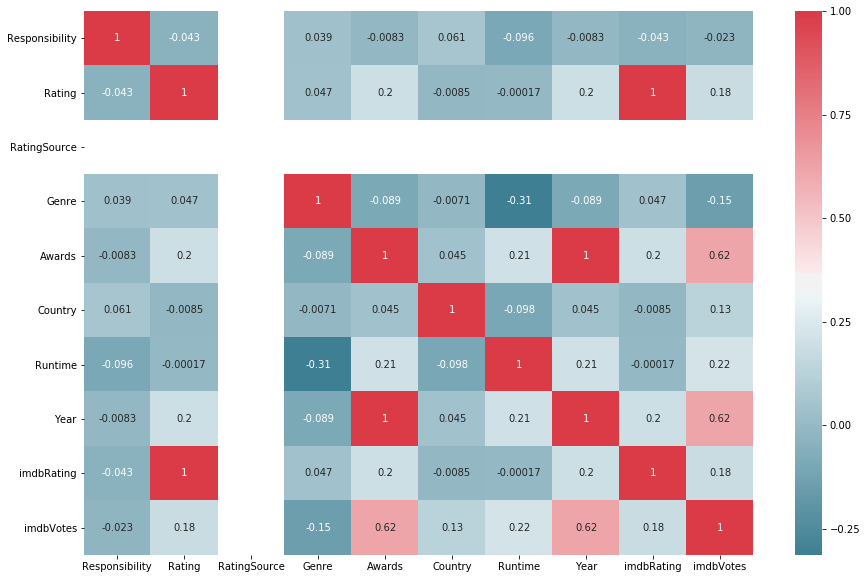

In [71]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize = (15,10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(Movies_df.corr(), annot=True, cmap = colormap)

correlation_heatmap(Movies_df)

In [72]:
X=Movies_df.drop(['Actors','imdbID','Director','Language','Released','imdbRating'],axis=1)
y=Movies_df['imdbRating']
print(X)

        Responsibility  Rating  RatingSource  Genre  Awards  Country  Runtime  \
0                  744     5.0             0      3       1      894       75   
18                 852     7.6             0      2       0      894       85   
22                 852     6.8             0      5       0      894       70   
24                 263     5.4             0      8       0      894      124   
32                 667     5.9             0     24       0      894       55   
33                 744     5.1             0     22       0      894       82   
39                 852     4.8             0     24       0      894       56   
40                 636     6.8             0      8       0      265       87   
41                 744     3.7             0      6       0      894       73   
45                 744     7.3             0      5       3      748      126   
53                 855     6.9             0      8       0      894       90   
68                 852     6

In [73]:
print(X.shape)
print(y.shape)

(16015, 9)
(16015,)


In [74]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12812, 9)
(12812,)
(3203, 9)
(3203,)


In [75]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)


In [76]:
# applying principal components analysis

from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[3.39768418e-01 3.11786872e-01 2.02922462e-01 9.49422624e-02
 3.07764589e-02 1.56441954e-02 4.15933194e-03 8.54094116e-34
 6.69996050e-36]


# Modeling

In [77]:
# splitting the dependent and independent variables

X=Movies_df.drop(['Actors','imdbID','Runtime','Year','imdbVotes','Director','Language','Released','imdbRating'],axis=1)
y=Movies_df['imdbRating']
print(X.shape)
print(y.shape)

(16015, 6)
(16015,)


In [78]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12812, 6)
(12812,)
(3203, 6)
(3203,)


In [79]:
# import the linear model from scikit learn
from sklearn import linear_model
# initialize our model
model=linear_model.LinearRegression()
#fit the model
model.fit(X_train,y_train)
# predicting the x-test results
y_pred=model.predict(X_test)

# calculating the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 1.0
Testing Accuracy : 1.0


In [80]:
# R_square for linear model
print('R_squared :',metrics.r2_score(y_test,y_pred))
# print('Adjusted R2 :',metrics.adjusted_rand_score(y_test,y_pred))


R_squared : 1.0


In [81]:
#error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 7.382861796848575e-15
Mean Squared Error: 9.762630885376916e-29
Root Mean Squared Error: 9.880602656405588e-15


In [82]:
# import the decision tree regression model from scikit learn
from sklearn.tree import DecisionTreeRegressor

# initialize our model
regressor=DecisionTreeRegressor(random_state=0)

#fit the model
regressor.fit(X_train,y_train)

# predicting the x-test results
y_pred = model.predict(X_test)

# calculating the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 1.0
Testing Accuracy : 1.0


In [83]:
# R_squared for Decision Tree Regression Model
print('R_squared :',metrics.r2_score(y_test,y_pred))
# print('Adjusted R2 :',metrics.adjusted_rand_score(y_test,y_pred))


R_squared : 1.0


In [84]:
#error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 7.382861796848575e-15
Mean Squared Error: 9.762630885376916e-29
Root Mean Squared Error: 9.880602656405588e-15


In [85]:
# import the random forest regression model from scikit learn
from sklearn.ensemble import RandomForestRegressor

# creating a model
model = RandomForestRegressor()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the x-test results
y_pred = model.predict(X_test)

# calculating the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 0.9999990588441203
Testing Accuracy : 0.9999963183804835


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
# R_squared for Random Forest Regression Model
print('R_squared :',metrics.r2_score(y_test,y_pred))
# print('Adjusted R2 :',metrics.adjusted_rand_score(y_test,y_pred))


R_squared : 0.9999963183804835


In [87]:
#error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 9.366219170421052e-05
Mean Squared Error: 4.807992507024759e-06
Root Mean Squared Error: 0.002192713503179282
